### Домашняя работа

**Задание среднего уровня** Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций  понадобилось?

In [1]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
from sklearn.metrics import r2_score
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler

boston_dataset = load_boston()
X = boston_dataset.data
y = boston_dataset.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#data = pd.read_csv('3.10_non_linear.csv', sep=',')
#data = data[(data.x_train > 1) & (data.x_train < 5)].copy()

#X = data['x_train'].values.reshape(-1, 1) # превращаем X из простого массива в вектор-столбец
#y = data['y_train'].values

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=10)

c:\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(

Итарации остановлены на шаге 35
r2- 0.6561926472010877


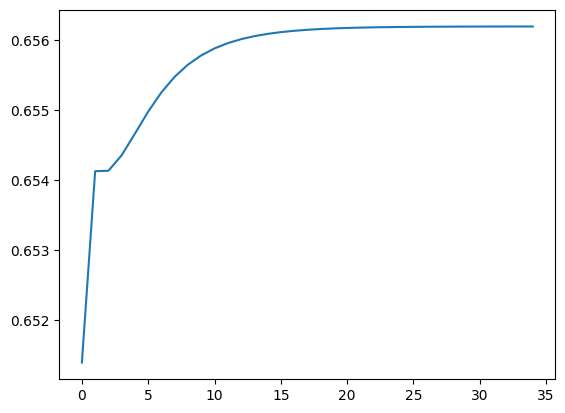

In [2]:


sgd_regressor = SGDRegressor(learning_rate='constant', eta0=0.009, fit_intercept=True, random_state=5)
w_current, epsilon = np.random.random(X.shape[1]),0.0001
weight_evolution, mse_evolution = [], [] # изменения весов и ошибка на валидации
for step in list(range(800)):
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
    weight_evolution.append(distance.euclidean(w_current, sgd_regressor.coef_))
    if weight_evolution[-1]<epsilon:
        print("Итарации остановлены на шаге %d" % step); break
    mse_evolution.append(r2_score(y_test, sgd_regressor.predict(X_test)))
    w_current = sgd_regressor.coef_.copy()
print("r2-",r2_score(y_test, sgd_regressor.predict(X_test)))
plt.plot(range(step), mse_evolution)
